# Crime data from 2015

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls data/2015

apr15.xls*  dec15.xls*  jan15.xls*  jun15.xls*  may15.xls*  oct15.xls*
aug15.xls*  feb15.xls*  jul15.xls*  mar15.xls*  nov15.xls*  sep15.xls*


In [3]:
path = 'data/2015'

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01,19,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 10 columns):
Date            120009 non-null datetime64[ns]
Hour            120009 non-null int64
Offense Type    120009 non-null object
Beat            120009 non-null object
Premise         117881 non-null object
BlockRange      120009 non-null object
StreetName      120009 non-null object
Type            120009 non-null object
Suffix          120009 non-null object
# offenses      120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.2+ MB


## Check for missing values

In [7]:
df.apply(lambda x: sum(x.isnull()))

Date               0
Hour               0
Offense Type       0
Beat               0
Premise         2128
BlockRange         0
StreetName         0
Type               0
Suffix             0
# offenses         0
dtype: int64

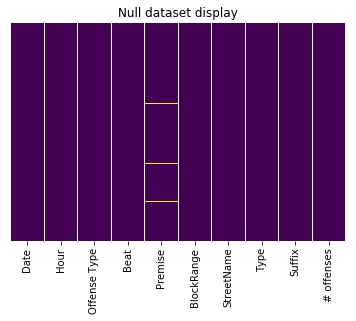

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup

- joining similar columns
- renaming

In [9]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2015-02-26,12,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05,16,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06,20,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16,8,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01,19,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


In [10]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 10 columns):
Date           120009 non-null datetime64[ns]
Hour           120009 non-null int64
OffenseType    120009 non-null object
Beat           120009 non-null object
Premise        117881 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
Type           120009 non-null object
Suffix         120009 non-null object
NumOffenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.2+ MB


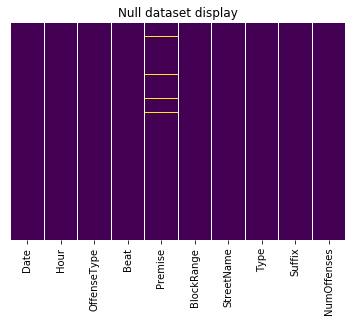

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [12]:
df.apply(lambda x: sum(x.isnull()))

Date              0
Hour              0
OffenseType       0
Beat              0
Premise        2128
BlockRange        0
StreetName        0
Type              0
Suffix            0
NumOffenses       0
dtype: int64

## Subset dataframe to work on 

In [13]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 8 columns):
Date           120009 non-null datetime64[ns]
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
OffenseType    120009 non-null object
Premise        117881 non-null object
NumOffenses    120009 non-null int64
Hour           120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.3+ MB


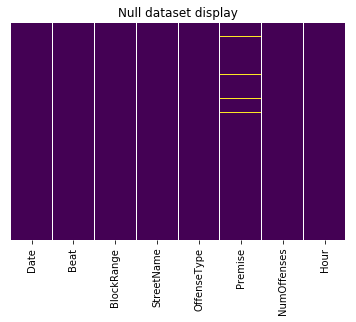

In [14]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

# FIND NAN

## Find NaN
- drop if > 2 nan

In [15]:
crimes.apply(lambda x: sum(x.isnull()))

Date              0
Beat              0
BlockRange        0
StreetName        0
OffenseType       0
Premise        2128
NumOffenses       0
Hour              0
dtype: int64

In [16]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
4,2015-04-01,10H10,UNK,SIDNEY,Theft,NaN,1,19
14,2009-05-18,10H10,4500-4599,CANAL,Theft,NaN,1,11
27,2015-04-21,10H10,3300-3399,NAVIGATION,Theft,NaN,1,13
39,2015-04-02,10H20,3800-3899,LAMAR,Burglary,NaN,1,0
56,2015-04-07,10H20,4300-4399,COYLE,Theft,NaN,1,14


## Problem
- find nan values and fix

In [17]:
null_premise = crimes.Premise.isnull()

In [18]:
crimes['Premise'] = crimes["Premise"].fillna('none')

In [19]:
crimes.apply(lambda x: sum(x.isnull()))

Date           0
Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
dtype: int64

## Inspect each column

In [20]:
crimes.dtypes

Date           datetime64[ns]
Beat                   object
BlockRange             object
StreetName             object
OffenseType            object
Premise                object
NumOffenses             int64
Hour                    int64
dtype: object

## Beat column
- total beats should be around 120

In [21]:
len(crimes.Beat.value_counts())

119

In [22]:
len(crimes.Beat.value_counts(dropna=False))

119

In [23]:
crimes.Beat.unique()[:10]

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20'], dtype=object)

In [24]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [25]:
len(crimes.Beat.value_counts(dropna=False))

119

In [26]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [27]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

119

In [28]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I50', '23J50', '24C10', '24C20',
       '24C30', '24C40', '24C50', '24C60', '2A10', '2A20', '2A30', '2A40',
       '2A50', '2A60', '3B10', '3B30', '3B40', '3B50', '4F10', '4F20',
       '4F30', '5F10', '5F20', '5F30', '5F40', '6B10', '6B20', '6B30',
       '6B40', '6B50', '6B60', '7C10', '7C20', '7C30', '7C40', '7C50',
       '

In [29]:
crimes.Beat.value_counts(dropna=False).head()

1A20     2716
13D20    2667
19G10    2548
6B60     2493
12D10    2466
Name: Beat, dtype: int64

## BlockRange

In [30]:
len(crimes.BlockRange.value_counts(dropna=False))

245

In [31]:
crimes.BlockRange.value_counts(dropna=False).head()

2300-2399    1678
100-199      1663
900-999      1577
UNK          1560
800-899      1496
Name: BlockRange, dtype: int64

In [32]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [33]:
len(crimes.BlockRange.value_counts(dropna=False))

245

## StreetName

In [34]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7918


In [35]:
# remove extra spaces
crimes.StreetName = crimes.StreetName.str.strip()


# make all lower case
crimes.StreetName = crimes.StreetName.str.lower()

In [36]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7913


In [37]:
print(crimes.StreetName.value_counts(dropna=False).head())

westheimer     3623
gulf           2138
sam houston    1718
north          1701
loop           1573
Name: StreetName, dtype: int64


## OffenseType
Total 8
- Theft
- Burlary
- Aggravated Assalult
- Robbery
- Auto Theft
- Rape
- Murder


In [38]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:8


In [39]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [40]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:8


In [41]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66309
Burglary              19824
Auto Theft            13113
Robbery               10274
Aggravated Assault     9209
Rape                    985
Murder                  287
NaN                       8
Name: OffenseType, dtype: int64


In [42]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

#### fill nans with most common value

In [43]:
crimes = crimes.fillna(crimes['OffenseType'].value_counts().index[0])

In [44]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66317
Burglary              19824
Auto Theft            13113
Robbery               10274
Aggravated Assault     9209
Rape                    985
Murder                  287
Name: OffenseType, dtype: int64


## Premise

In [45]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:125


In [46]:
crimes.Premise = crimes.Premise.str.strip()
crimes.Premise = crimes.Premise.str.lower()




In [47]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:125


In [48]:
crimes.Premise.value_counts(dropna=False).head()

residence or house                     16814
apartment parking lot                  13220
apartment                              11815
road, street, or sidewalk              11390
restaurant or cafeteria parking lot     4897
Name: Premise, dtype: int64

# Date column

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 10 columns):
Date           120009 non-null datetime64[ns]
Hour           120009 non-null int64
OffenseType    120009 non-null object
Beat           120009 non-null object
Premise        117881 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
Type           120009 non-null object
Suffix         120009 non-null object
NumOffenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.2+ MB


## Date
- make datetime index

In [50]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [51]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
Date,,,,,,,
1915-01-05,3B10,3200-3299,mangum rd 180,Theft,other parking lot,1,22
1915-01-14,5F10,7000-7099,westview,Auto Theft,apartment parking lot,1,23
1915-04-24,1A20,3100-3199,smith,Burglary,office building,1,7
1915-07-30,11H10,5600-5699,truett,Rape,"other, unknown, or not listed",1,10
1915-09-03,19G20,11700-11799,beechnut,Burglary,rental storage facility,1,13


## Create Columns with day,weekday,month,year from datetime index

It allows us to view incorect reports by date better

In [52]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [53]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1915-01-05,3B10,3200-3299,mangum rd 180,Theft,other parking lot,1,22,05,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,westview,Auto Theft,apartment parking lot,1,23,14,Thursday,Jan,1915
1915-04-24,1A20,3100-3199,smith,Burglary,office building,1,7,24,Saturday,Apr,1915
1915-07-30,11H10,5600-5699,truett,Rape,"other, unknown, or not listed",1,10,30,Friday,Jul,1915
1915-09-03,19G20,11700-11799,beechnut,Burglary,rental storage facility,1,13,03,Friday,Sep,1915


In [54]:
crimes.year.value_counts(dropna=False)

2015    119036
2014       782
2013        73
2012        30
2010         9
2005         9
2009         8
1915         8
2011         8
2007         6
2008         5
1980         4
2006         4
2000         4
2003         3
1999         2
2001         2
1995         2
2004         2
1996         2
1998         2
1979         1
1991         1
1916         1
1993         1
1964         1
1972         1
2002         1
1989         1
Name: year, dtype: int64

We can see now that many reports have incorect year

In [55]:
yr = crimes.year == '2015'
len(crimes[~yr].year.unique())

28

## null values

- check
- count
- display

In [56]:
crimes.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

In [57]:
# display any null
len(crimes[crimes.isnull().any(axis=1)])

0

In [58]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [59]:
crimes = crimes.dropna(subset=['BlockRange', 'StreetName'])

In [60]:
crimes.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

## New Dataframe
- remove premise col
- keep premise description

In [61]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1915-01-05,3B10,3200-3299,mangum rd 180,Theft,other parking lot,1,22,05,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,westview,Auto Theft,apartment parking lot,1,23,14,Thursday,Jan,1915
1915-04-24,1A20,3100-3199,smith,Burglary,office building,1,7,24,Saturday,Apr,1915
1915-07-30,11H10,5600-5699,truett,Rape,"other, unknown, or not listed",1,10,30,Friday,Jul,1915
1915-09-03,19G20,11700-11799,beechnut,Burglary,rental storage facility,1,13,03,Friday,Sep,1915


In [62]:
crime_yr.isnull().values.any().any()

False

In [63]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [64]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [65]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120009 entries, 1915-01-05 to 2015-12-31
Data columns (total 11 columns):
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
OffenseType    120009 non-null object
Premise        120009 non-null object
NumOffenses    120009 non-null int64
Hour           120009 non-null int64
day            120009 non-null object
weekday        120009 non-null object
month          120009 non-null object
year           120009 non-null object
dtypes: int64(2), object(9)
memory usage: 11.0+ MB


In [66]:
crime_yr.to_csv('data/clean/crime15_clean.csv')

In [67]:
ls data/clean

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime13_clean.csv*  crime15_clean.csv*  crime17_clean.csv*
